## ANLY-590 HW0
### Hanlong Peng

#### Problem 1

Regularization. Using the accompanying Hitters dataset, we will explore regression models to predict a player's Salary from other variables. You can use any programming languages or frameworks that you wish.

https://gist.github.com/keeganhines/59974f1ebef97bbaa44fb19143f90bad (链接到外部网站。)

In [75]:
import pandas as pd
import numpy as np
from pprint import pprint
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

df = pd.read_csv("Hitters.csv",sep=",")
df = df.dropna().drop(df.columns[0], axis = 1)

#### 1.1
Use LASSO regression to predict Salary from the other numeric predictors (you should omit the categorical predictors). Create a visualization of the coefficient trajectories. Comment on which are the final three predictors that remain in the model. Use cross-validation to find the optimal value of the regularization penality. How many predictors are left in that model?

In [76]:
y = df.Salary

X = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1)

In [85]:
alphas = np.linspace(0,30,1000)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


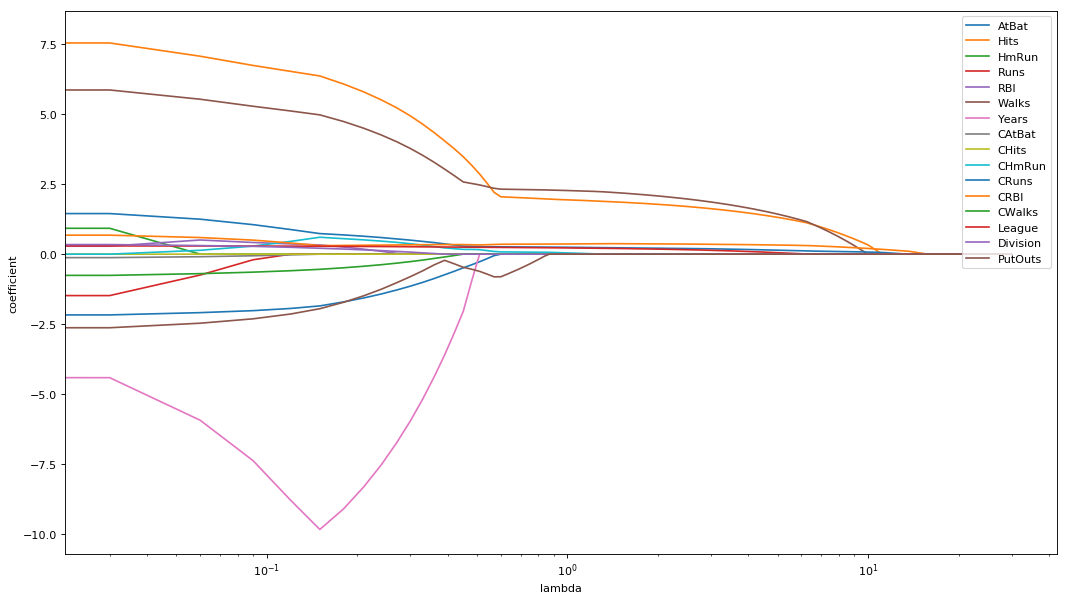

In [86]:
lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X, y)
    coefs.append(lasso.coef_)
from matplotlib.pyplot import figure
figure(num=None, figsize=(16, 9), dpi=80, facecolor='w', edgecolor='k')    
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.legend(df.columns.values,loc = 1)
plt.xlabel('lambda')
plt.ylabel('coefficient')
plt.title('Lasso coefficient trajectories')
plt.show()

From the graph we can see the final three predictors are 'Hits', 'CHmRun','CRBI'.

In [87]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X, y)
lasso.set_params(alpha=lassocv.alpha_)
#The optimal value of the regularization penality
lassocv.alpha_

0.063548175998574499

In [88]:
lasso.fit(X,y)
pd.Series(lasso.coef_, index=X.columns)

AtBat     -2.082954
Hits       7.041011
HmRun      0.000000
Runs      -0.682615
RBI        0.496552
Walks      5.511781
Years     -6.107625
CAtBat    -0.087066
CHits      0.000000
CHmRun     0.156468
CRuns      1.228061
CRBI       0.583821
CWalks    -0.690601
PutOuts    0.292694
Assists    0.304372
Errors    -2.450795
dtype: float64

There are 14 predictors left in the final model.

#### 1.2
Repeat with Ridge Regression. Visualize coeffecient trajectories. Use cross-validation to find the optimal value of the regularization penalty.

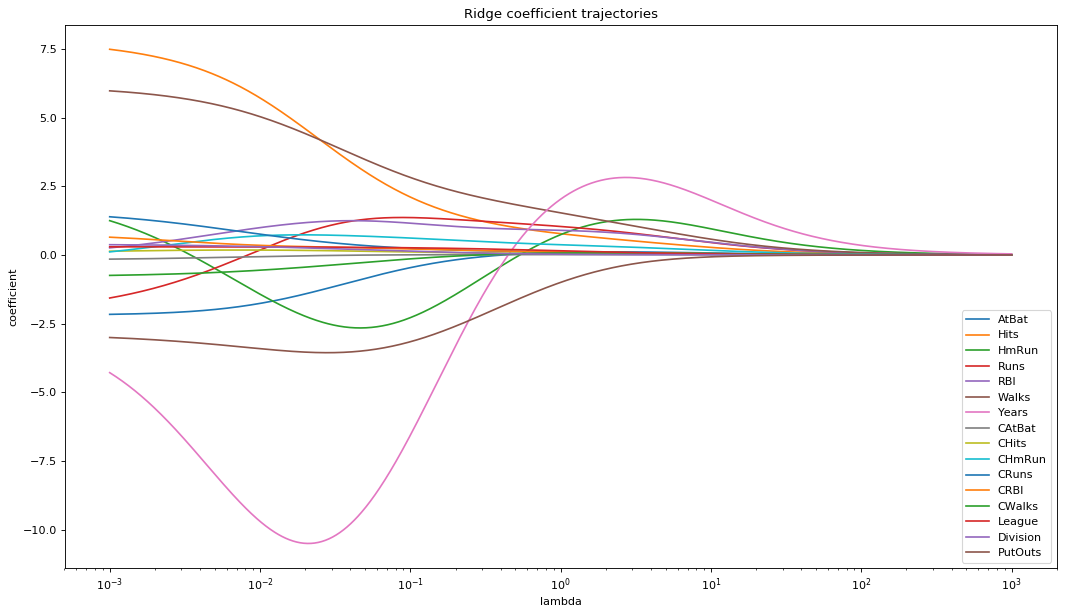

In [115]:
alphas1 = np.logspace(-3,3,1000)

coefs = []

for a in alphas1:
    ridge = Ridge(alpha=a,normalize= True, max_iter = 10000)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

figure(num=None, figsize=(16, 9), dpi=80, facecolor='w', edgecolor='k') 
ax = plt.gca()
ax.plot(alphas1, coefs)
ax.set_xscale('log')
ax.legend(df.columns.values,loc = 4)
plt.xlabel('lambda')
plt.ylabel('coefficient')
plt.title('Ridge coefficient trajectories')
plt.show()

In [126]:
ridgecv = RidgeCV(alphas = alphas1, normalize = True, cv = 10)
ridgecv.fit(X, y)
ridgecv.alpha_

1000.0

In [123]:
ridge.fit(X,y)
pd.Series(ridge.coef_, index=X.columns)

AtBat      0.001200
Hits       0.004358
HmRun      0.017533
Runs       0.007367
RBI        0.007779
Walks      0.009161
Years      0.037396
CAtBat     0.000103
CHits      0.000379
CHmRun     0.002860
CRuns      0.000761
CRBI       0.000785
CWalks     0.000830
PutOuts    0.000482
Assists    0.000079
Errors    -0.000373
dtype: float64

### 2
Short Answer. Explain in your own words the bias-variance tradeoff. What role does regularization play in this tradeoff? Make reference to your findings in number (1) to describe models of high/low bias and variance.

The bias-variance tradeoff is for predictive model, if the model has a lower bias then it should have a higher variance and vice versa. Regullarization can help us prevent overfitting and solve ill posed problem. It can help us find out the importance of the variables by finding the optimal penalty. And lasso can eliminate non-important variables to reduce over-fitting. 
From cross validation, we see that models with high complexity usually have low bias and high variance, vice versa. High complexity models are usually overfitting. The ultimate goal is to find a model with both low variance and low bias, that is the optinum model complexity. 